In [2]:
# Import Libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # library for making statistical graphics 
import datetime as dt

In [3]:
import sklearn # sk learn library contains a lot statistical modeling tools e.g classification, regression 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
#Let's view last five row dataset by default ISO 
df = pd.read_csv('OnlineRetail.csv',encoding="ISO-8859-1")#ISO 8859-1 is a single-byte encoding that can represent the first 256 Unicode characters
df.tail() #displays the last five rows of the dataframe by default

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
# Remove the row that contains null values
df = df.dropna()

In [6]:
# Create new field Amount group by CustomerID
df['Amount'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.tail()

,CustomerID,Amount
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88
4371,18287.0,1837.28


In [7]:
# Overview of the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [8]:
# Overview of the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [9]:
# Generates descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distributions
df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


# RFM + K-Means Extended (Frequency)

In [10]:
# To understand the behavior of the customer RFM metrics affected customer’s lifetime value, and recency affects retention, a measure of engagement
# Freq Customer by counting invoice numbers of each customer 
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index() #The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# RFM + K-Means Extended (Recency)

In [17]:
# Calculating recency by subtracting the very recent date with the last transaction date of the customers
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [18]:
# Calculating recency by subtracting the very recent date with the last transaction date of the customers
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


calculating monetary by summing up all the amounts of the customer# 

In [20]:
# RFM Group By CustomerID
rfm = pd.merge(recency,frequency, on='CustomerID', how='inner')
rfm = pd.merge(rfm,monetary, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','recency','frequency', 'monetary']
rfm

,CustomerID,recency,frequency,monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88


# Outliers Detection

In [21]:
#Create Box Plot with standart scalar in order to accurate prediction 
scaler = StandardScaler() #scaler for calculate mean and variance from the features (modeling)
rfm_normalized = rfm[['monetary','frequency','recency']]
rfm_normalized

,monetary,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


In [22]:
#transform the data and standardize 
rfm_normalized = scaler.fit_transform(rfm_normalized) 
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized = rfm[['monetary','frequency','recency']]
rfm_normalized

,monetary,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


# K-Means

In [23]:
#Find K-Value for the K-Means Clustering 
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=4)

In [24]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans =KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    ssd.append(kmeans.inertia_) 

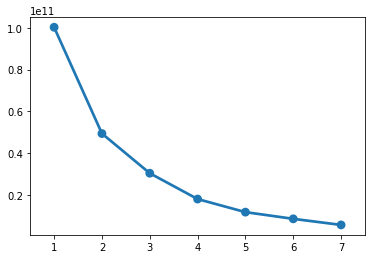

In [32]:
sns.pointplot(x=list(range(1,8)),y=ssd)
plt.show()

In [26]:
#Find K-Value for the K-Means Clustering 
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=4)

In [27]:
rfm_normalized.loc[:,'CustomerID'] = rfm['CustomerID']
rfm_normalized

,monetary,frequency,recency,CustomerID
0,0.00,2,325,12346.0
1,4310.00,182,1,12347.0
2,1797.24,31,74,12348.0
3,1757.55,73,18,12349.0
4,334.40,17,309,12350.0
...,...,...,...,...
4367,180.60,10,277,18280.0
4368,80.82,7,180,18281.0
4369,176.60,13,7,18282.0
4370,2094.88,756,3,18283.0


In [28]:
# Clustering labels in column 
rfm_normalized['cluster'] = kmeans.labels_
rfm_normalized

,monetary,frequency,recency,CustomerID,cluster
0,0.00,2,325,12346.0,0
1,4310.00,182,1,12347.0,0
2,1797.24,31,74,12348.0,0
3,1757.55,73,18,12349.0,0
4,334.40,17,309,12350.0,0
...,...,...,...,...,...
4367,180.60,10,277,18280.0,0
4368,80.82,7,180,18281.0,0
4369,176.60,13,7,18282.0,0
4370,2094.88,756,3,18283.0,0


<AxesSubplot:xlabel='cluster', ylabel='recency'>

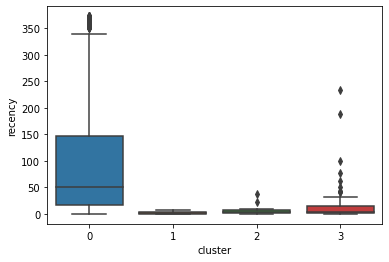

In [88]:
#cluster customer by recency
sns.boxplot(x='cluster', y='recency', data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

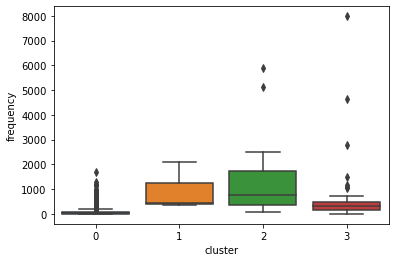

In [89]:
#cluster customer by frequency
sns.boxplot(x='cluster', y='frequency', data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='monetary'>

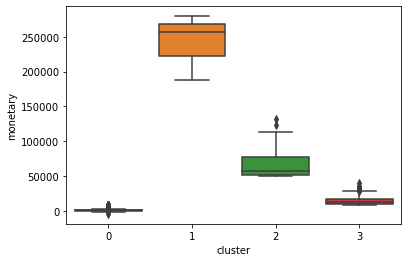

In [90]:
#cluster customer by monetary
sns.boxplot(x='cluster', y='monetary', data=rfm_normalized)

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\ANISAD~1\AppData\Local\Temp/ipykernel_17880/2680279531.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


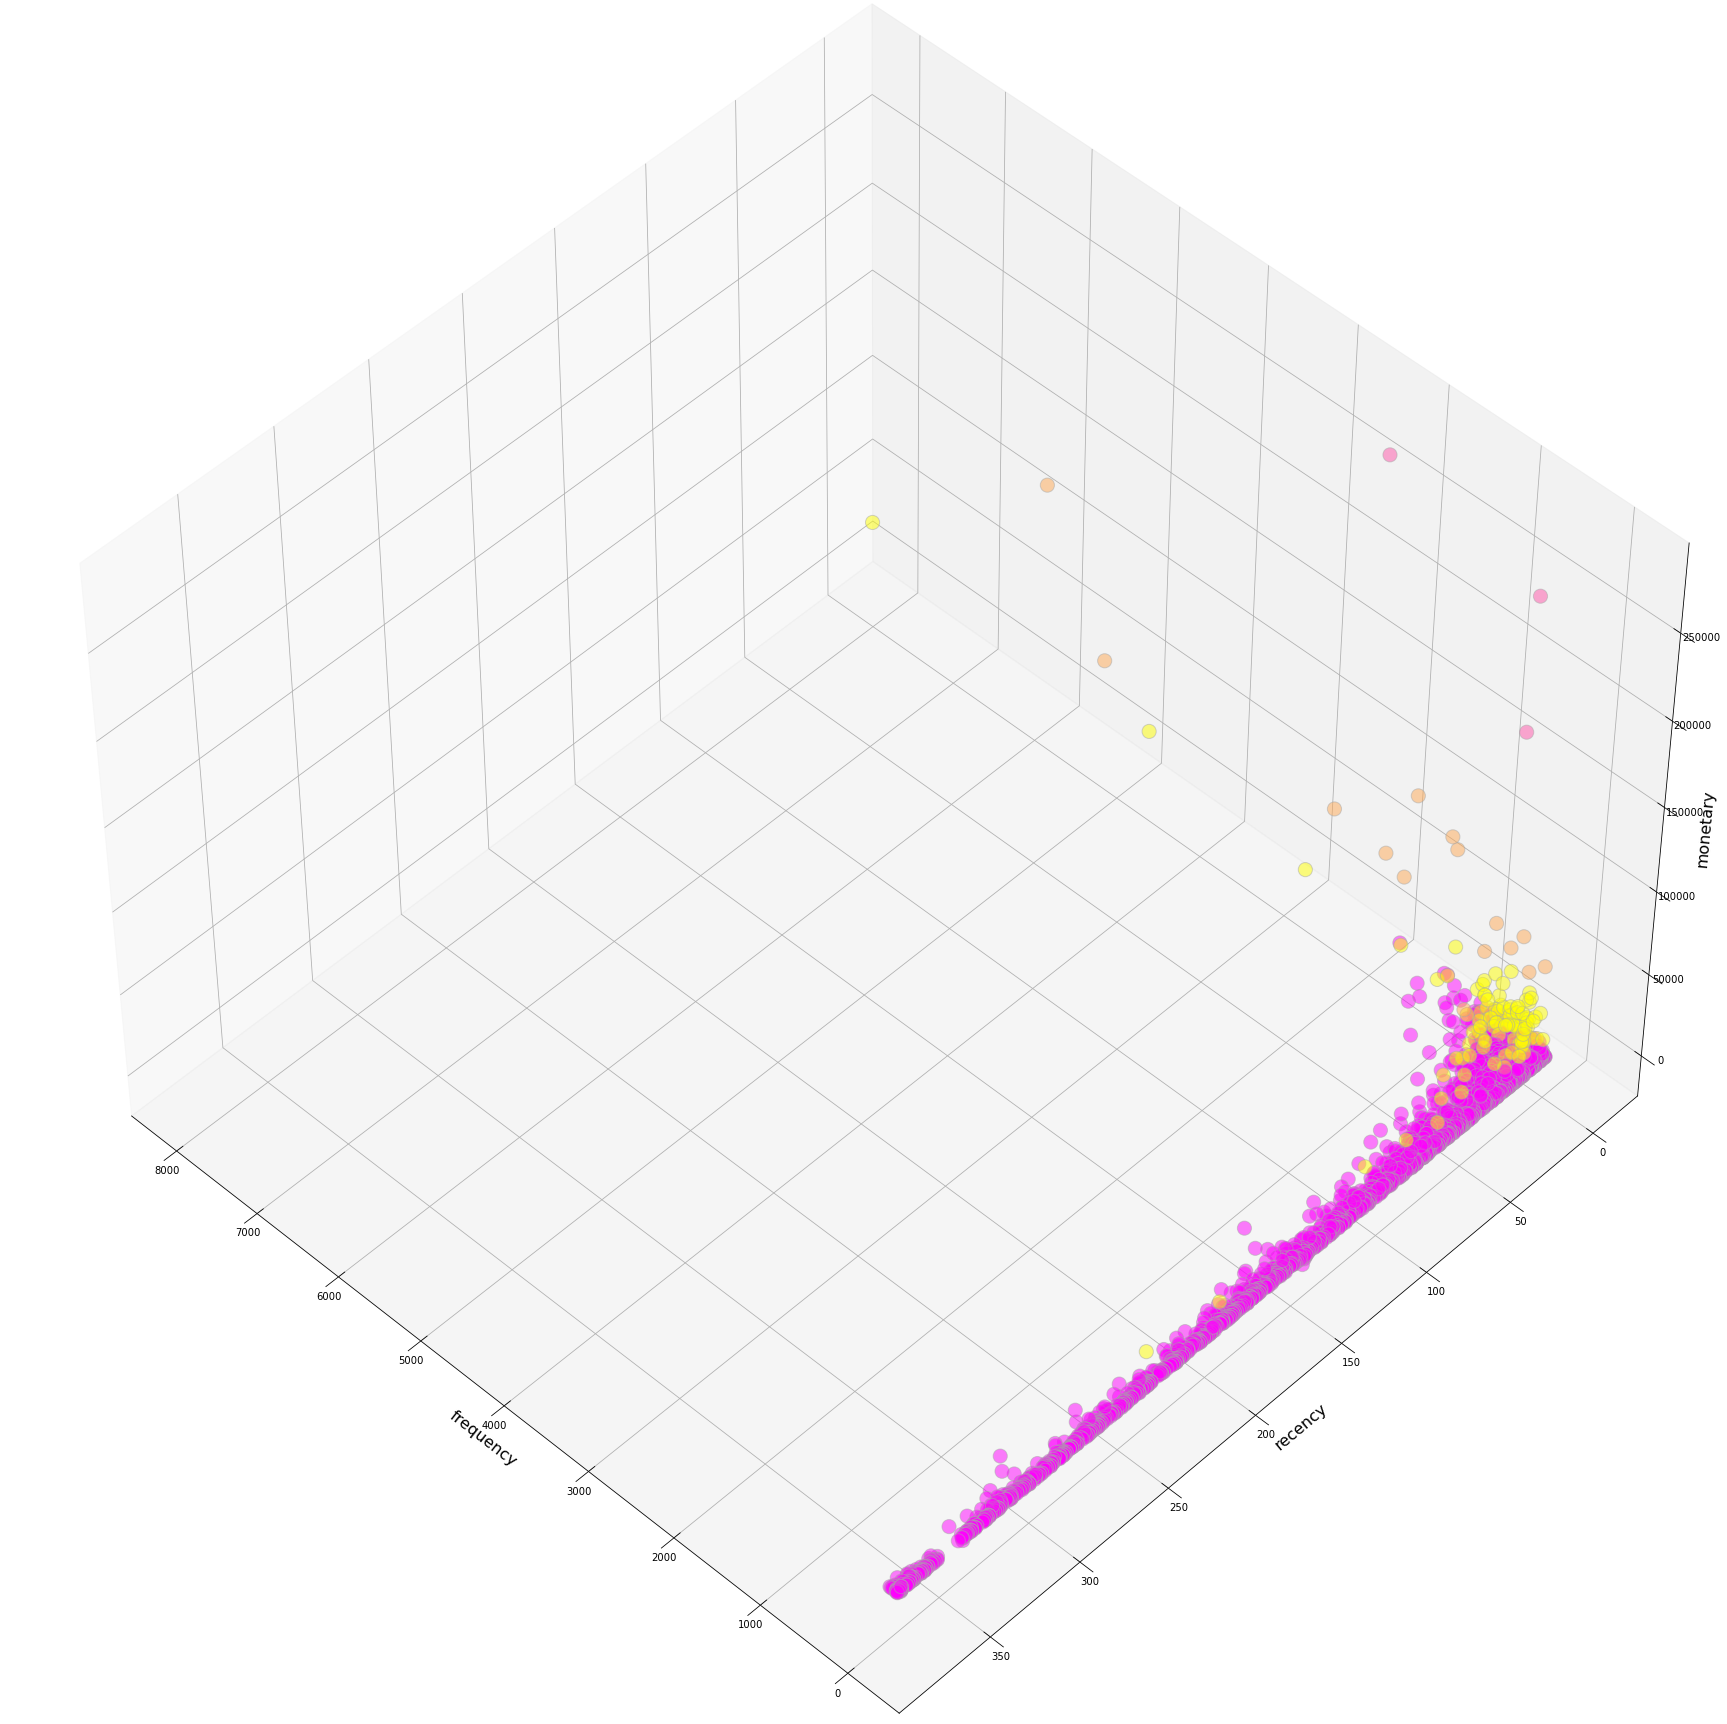

In [95]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,25)
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig,
           rect = [0, 0, .95, 1],
           elev = 48,
           azim = 134)

plt.cla()
ax.scatter(rfm_normalized['frequency'], rfm_normalized['recency'], rfm_normalized['monetary'],
          c = rfm_normalized ['cluster'],
          s = 200,
          cmap = 'spring',
          alpha = 0.5,
          edgecolor = 'darkgrey')

ax.set_xlabel('frequency',
             fontsize = 16)
ax.set_ylabel('recency',
             fontsize = 16)
ax.set_zlabel('monetary',
             fontsize = 16)

plt.show()